# **Ejercicios de pair programming Módulo 2 - Sprint 2**
## **EDA II. Nulos y Outliers**
---

In [1]:
import pandas as pd
import sidetable
import numpy as np
import seaborn as sns
import os
if 'eda' not in os.getcwd():
    os.chdir('eda')

**Hipótesis**  

Las hipótesis que os planteamos para el conjunto de datos de `historico_tickets` son:  

- Tiempo de resolución: Se podría hipotetizar que los tickets con mayor severidad y prioridad son resueltos en menos días que los tickets con menor prioridad. Además, se podría examinar si hay alguna correlación entre el tipo de problema y el tiempo que toma resolverlo.  
>La pregunta que contestaremos es: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?  
- Satisfacción del cliente: Se podría hipotetizar que la satisfacción del cliente está relacionada con la velocidad de resolución del ticket y la categoría del problema. Por ejemplo, los clientes podrían estar más satisfechos si sus problemas de acceso y login se resuelven rápidamente en comparación con los problemas de software más complejos.  
>La pregunta que contestaremos es: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?  
- Desempeño del agente: Se podría hipotetizar que algunos agentes tienen un mejor desempeño que otros en la resolución de tickets. Se podrían explorar variables como el número de tickets asignados, el tiempo promedio de resolución y la satisfacción del cliente para identificar patrones en el desempeño de los agentes.  
>La pregunta que contestaremos es: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?  
- Cambios en el tiempo: Se podría hipotetizar que el volumen y la naturaleza de los problemas cambian con el tiempo. Por ejemplo, se podría explorar si hay un aumento en los problemas de acceso y login durante un determinado período de tiempo, o si hay una correlación entre la temporada del año y el tipo de problema reportado.  
>La pregunta que contestaremos es: ¿Hay alguna diferencia entre a lo largo del tiempo entre las distintas categorías de solicitudes de tickets que tenemos?  

**Objetivos**  

📌 **Nota** Igual que siempre, no nos vale solo con picar el código, queremos que nos incluyais las conclusiones que extraeis.  

Usad la librería sidetable para:  

1. Explorar los valores nulos.

In [2]:
df = pd.read_csv('../datos/historico_tickets_limpio_pandas.csv', index_col=0)
df.sample()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
12743,SHLTER-8243140058,2018-02-09,815,50,Software,Solicitud,2 - Normal,3 - Alta,7,5,1 semestre,2018,Febrero


In [3]:
df.stb.missing()

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


- No tenemos nulos en ninguna columna

2. Explorad la columna de `categoría` y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.

In [4]:
df.stb.freq(['categoría'], thresh=70)

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


3. Explorad la columna `categoría` en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.

In [5]:
df.stb.freq(['categoría', 'tipo'], thresh=70)

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000


4. Haced los mismo para la columna `tipo` en relación a la columna `semestre`. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.

In [6]:
df.stb.freq(['tipo', 'semestre'], thresh=60)

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


In [7]:
df.stb.freq(['tipo', 'semestre'])

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,Solicitud,1 semestre,35675,36.632576,73138,75.101144
2,Problema,2º semestre,12413,12.746185,85551,87.847329
3,Problema,1 semestre,11835,12.152671,97386,100.000000


- Por debajo del 60% únicamente tenemos el tipo 'Solicitud' en el '2º semestre' por lo tanto nos da poca información, llegando tan solo al 38,47%. Por lo que nos interesaría sacar un porcentaje mayor para capturar las dos primeras categorías, que llegan al 75,10%.

In [11]:
df.stb.freq(['tipo', 'semestre'], thresh=80)

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,Solicitud,1 semestre,35675,36.632576,73138,75.101144
2,others,others,24248,24.898856,97386,100.000000


5. Por último, realizad este análisis para la columna `mes` en relación a la columna `tipo`. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.

In [8]:
df.stb.freq(['mes', 'tipo'], thresh=60)

,mes,tipo,count,percent,cumulative_count,cumulative_percent
0,Octubre,Solicitud,6378,6.549196,6378,6.549196
1,Agosto,Solicitud,6360,6.530713,12738,13.079909
2,Diciembre,Solicitud,6305,6.474237,19043,19.554145
3,Noviembre,Solicitud,6192,6.358203,25235,25.912349
4,Marzo,Solicitud,6186,6.352042,31421,32.264391
5,Septiembre,Solicitud,6168,6.333559,37589,38.597950
6,Junio,Solicitud,6107,6.270922,43696,44.868872
7,Mayo,Solicitud,6078,6.241143,49774,51.110016
8,Julio,Solicitud,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:  
6.1. Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.  
6.2. Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.   

In [9]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.sample(5)

,id_empleado,id_agente,días_resolución,satisfacción,año
14900,1712,18,10,5,2017
2617,1317,5,4,5,2018
11380,1572,3,4,3,2019
1761,869,8,2,5,2017
6407,1046,31,0,5,2018


- Aunque tenemos 5 categorías numéricas realmente la única columna con información numérica que se puede ser representativa en un boxplot sería la de 'días_resolución'. Los id no tiene sentido representarlos así porque son números identificativos. La satisfacción y el año aunque sean datos numéricos en realidad conceptualmente funcionan como categorías.

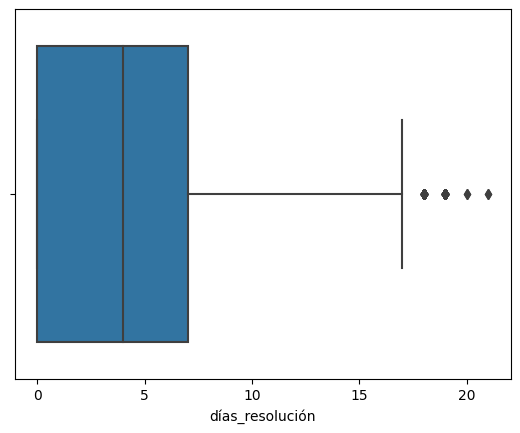

In [10]:
sns.boxplot(x='días_resolución', data=df_numericas);

- En la columna 'días_resolución' tenemos una mediana en torno a 4 días. Respecto a los límites del cajón, el 25% corresponde a 0 días, mientras que el percentil 75 corresponde a unos 7 días, por lo que el 75% de las resoluciones se ha hecho en menos de 7 días. Solo tenemos "bigote" a la derecha, llegando hasta los 17 días aproximadamente. Más allá de este valor tenemos algunos valores atípicos (outliers) que llegan hasta los 21 días aproximadamente, distanciandose de los valores considerados típicos para la resolución de los tickets y desvirtuando el valor de algunos estadísticos como la media, por lo que podría ser interesante eliminarlos del registro general de cara tener estadísticos más robustos. Sim embargo, en lugar de borrarlos directamente, podría ser más interesante extraerlos a un dataframe particular para analizar sus características y ver si hay algún patrón estre sus características y si es así buscar una solución a la causa de dichos outliers.

**Conclusiones**  

Si bien es cierto que la lección de hoy ha sido muy teórica, en esta parte los ejercicios no serán tanto de programar sino de pensar 🤔. ¿Qué tendréis que hacer?

- En relación a los valores nulos:
    - Identificar las columnas que tienen nulos (lo hicimos en el ejercicio de pair programming EDA I y en el de hoy con el sidetable).
    - Debatid entre vosotras qué haríais con los valores nulos, ¿los quitaríais o los reemplazaríais con un valor que nosotras decidiremos?. Cread una celda de markdown en vuestro jupyter y escribid vuestras conclusiones.

- Hemos indicado las conclusiones arriba, en cada apartado